# countplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

**Countplot** - это тип графика, который используется для визуализации количества наблюдений в каждой категории переменной. Он особенно полезен в работе с категориальными данными, то есть данными, которые разделены на несколько групп или категорий, например, марки автомобилей или категории продуктов. *Countplot* помогает наглядно показать, сколько элементов принадлежит каждой из этих групп.

График выглядит как столбчатая диаграмма, где по одной оси указаны категории, а по другой - количество наблюдений в каждой категории. Такой вид графика делает легким сравнение количества элементов между разными группами и выявление наиболее популярных или распространенных категорий.

Основные параметры функции `sns.barplot()`:
- `data`: DataFrame или массив, содержащий данные для построения графика;
- `x`: название переменной или вектор данных для оси X;
- `y`: название переменной или вектор данных для оси Y;
- `hue`: название переменной или вектор данных, определяющий расцветку столбцов;
- `order`: упорядоченный список уникальных значений для той оси, на которой отображаются категориальные данные;
- `hue_order`: упорядоченный список уникальных значений для переменной hue;
- `color`: цвет столбцов;
- `palette`: палитра цветов для переменной hue;
- `saturation`: степень насыщенности цвета столбцов. Значение по умолчанию = 0.75;
- `width`: задает относительную ширину столбцов. Значение по умолчанию = 0.8;
- `dodge`: логическое значение, определяющее, будут ли столбцы разных категорий hue расположены рядом (если True) или наложены друг на друга (если False);
- `stat`: определяет, какую статистику нужно вычислять и отображать на диаграмме ('count', 'frequency', 'density', 'percent');
formatter: функция форматирования значений.

Рассматривать варианты построения графиков *countplot* будем на примере данных из датасета `'diamonds'`. Для начала загрузим этот датасет из библиотеки *seaborn* и посмотрим на содержащуюся в нём информацию:

In [3]:
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


Датасет `'diamonds'` содержит информацию о различных параметрах бриллиантов. Вот какие данные содержатся в каждой колонке этого датасета:
- `carat (карат)`: Вес бриллианта в каратах. Карат - это единица измерения массы, которая равна 0.2 грамма;
- `cut (качество огранки)`: Категория, описывающая качество огранки бриллианта. Возможные значения: Fair (удовлетворительное качество), Good (хорошее качество), Very Good (очень хорошее качество), Premium (премиум качество), Ideal (идеальное качество);
- `color (цвет)`: Отражает цвет бриллианта. Международная система GIA описывает наивысший цвет латинской буквой D, и далее по нисходящей идут цвета E, F, G, H, I, J и т.д. Маркировка цвета D означает "бесцветный" и является наиболее ценным;
- `clarity (чистота)`: Оценка чистоты бриллианта, то есть наличия или отсутствия дефектов. Значения варьируются от I1 (с наибольшими дефектами) до IF (без включений);
- `depth (глубина)`: Процентное соотношение максимальной глубины бриллианта к его среднему диаметру;
- `table (таблица)`: Процентное соотношение ширины верхней грани бриллианта к его общей ширине;
- `price (цена)`: Цена бриллианта в долларах США;
- `x (длина)`: Длина бриллианта в миллиметрах;
- `y (ширина)`: Ширина бриллианта в миллиметрах;
- `z (глубина)`: Глубина бриллианта в миллиметрах.

Построим график *countplot* по столбцу `'color'`:

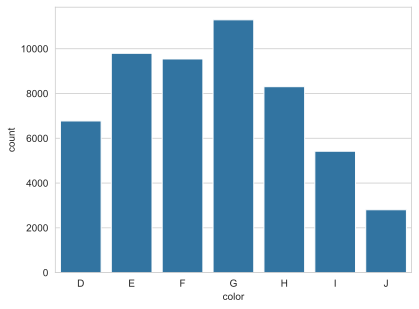

In [5]:
sns.set_style('whitegrid')

sns.countplot(data=diamonds, x='color');

В итоге, по оси абсцисс отложились категории цвета бриллиантов, а по оси ординат - количество позиций в каждой из этих категорий.

Построим горизонтальную версию диаграммы, для чего передадим категориальную переменную `'color'` параметру `y`:

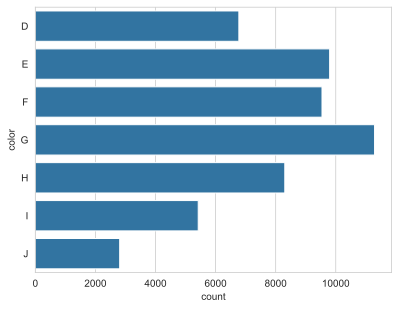

In [6]:
sns.countplot(data=diamonds, y='color');

В функции `sns.countplot()`, также как и в других функциях, имеется параметр `color`, задающий единый цвет для всех столбцов на графике. Например:

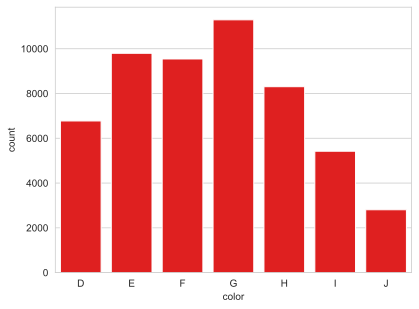

In [8]:
sns.countplot(data=diamonds, x='color',
              color='Red');

Изменим цветовую палитру при помощи параметра `palette`:

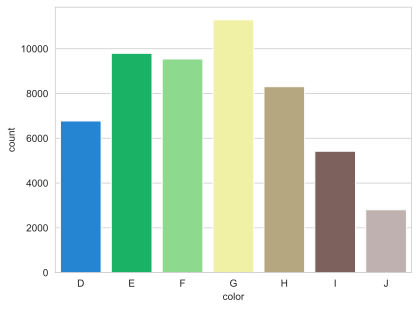

In [9]:
sns.countplot(data=diamonds, x='color',
              hue='color',
              palette='terrain');

Библиотека *seaborn* предоставляет пользователям возможность создавать собственные палитры, для чего нужно передать параметру `palette` список с наименованиями цветов в нужном количестве. Для примера создадим свой список цветов и раскрасим ими наш график:

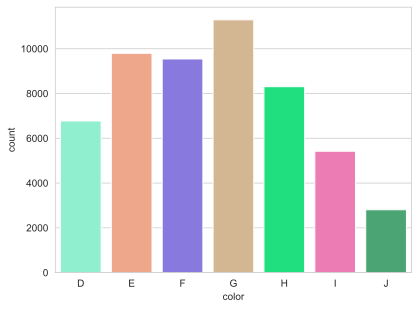

In [10]:
my_palette = ['Aquamarine', 'LightSalmon', 'MediumSlateBlue', 'BurlyWood', 'SpringGreen', 
              'HotPink', 'MediumSeaGreen']

sns.countplot(data=diamonds, x='color',
              hue='color',
              palette=my_palette);

Посмотрим на качество огранки в разрезе цвета бриллианта:

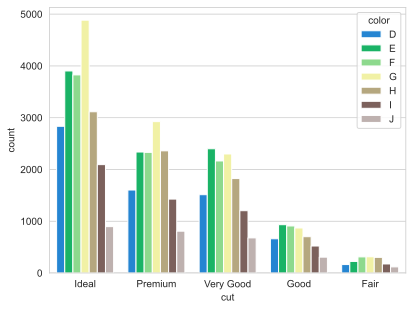

In [11]:
sns.countplot(data=diamonds, x='cut',
              palette='terrain',
              hue='color');

**Параметр hue_order**

Параметром `hue_order` можно менять порядок отображения категорий, определенных параметром `hue`. 

Изменим порядок отображения цвета бриллиантов в предыдущем графике:

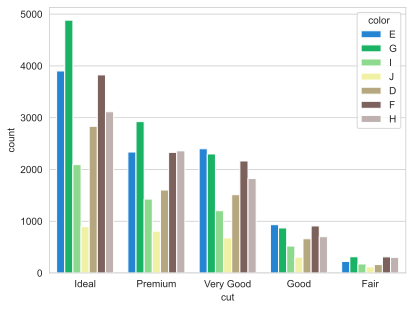

In [12]:
sns.countplot(data=diamonds, x='cut',
              palette='terrain',
              hue='color',
              hue_order=['E', 'G', 'I', 'J', 'D', 'F', 'H']);

Также параметром `hue_order` можно на диаграмме убрать ненужные категории. Например оставим на графике только три категории цвета, соответсвующие наивысшему качеству:

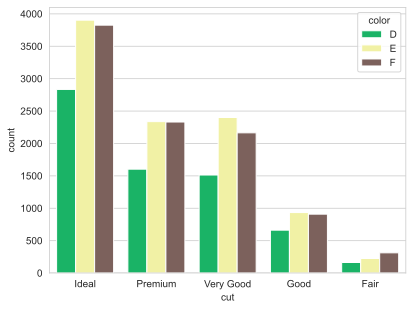

In [13]:
sns.countplot(data=diamonds, x='cut',
              palette='terrain',
              hue='color',
              hue_order=['D', 'E', 'F']);

Параметром `hue_order` также возможно управлять расположением столбцов на графике по возрастанию или убыванию.

Например, вернёмся к графику распределения бриллиантов по их цвету:

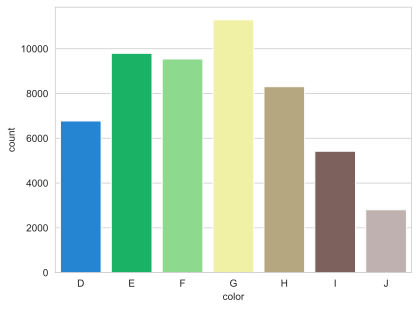

In [14]:
sns.countplot(data=diamonds, x='color',
              hue='color',
              palette='terrain');

Методом `value_counts()` отсортируем категории цвета по убыванию:

In [15]:
diamonds['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Получим индексы:

In [16]:
diamonds['color'].value_counts().index

CategoricalIndex(['G', 'E', 'F', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category', name='color')

И передадим их параметру hue_order:

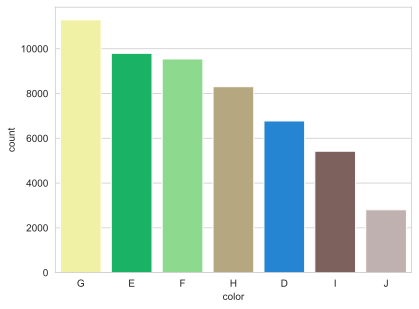

In [17]:
sns.countplot(data=diamonds, x='color',
              hue='color',
              palette='terrain',
              order=diamonds['color'].value_counts().index);

И в итоге получаем диаграмму со столбцами, отсортированными по убыванию.

Или отсортируем по возрастанию:

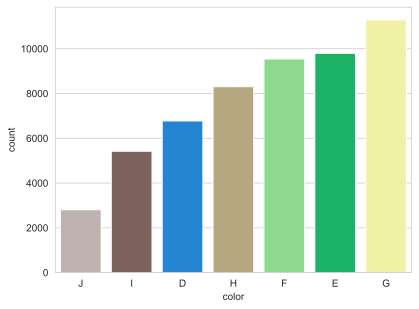

In [18]:
sns.countplot(data=diamonds, x='color',
              hue='color',
              palette='terrain',
              order=diamonds['color'].value_counts(ascending=True).index);

Параметром `edgecolor` можно менять цвет границ столбцов, а параметром `linewidth` - ширину линии этих границ:

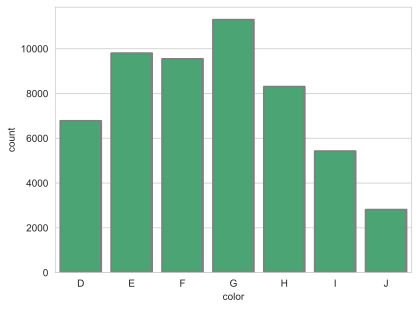

In [20]:
sns.countplot(data=diamonds, x='color',
              color='MediumSeaGreen',
              linewidth=2,
              edgecolor='grey');

Ещё у финкции `sns.countplot()`, как и у некоторых других функций, есть параметр `hatch`, который позволяет заштриховать площадь столбцов. В этом случае, параметру `hatch` нужно передать строку, содержащую тип штриховки, например, `'/', '//', 'o', '*'`.

Для примера заштрихуем столбцы диаграммы косой чертой:

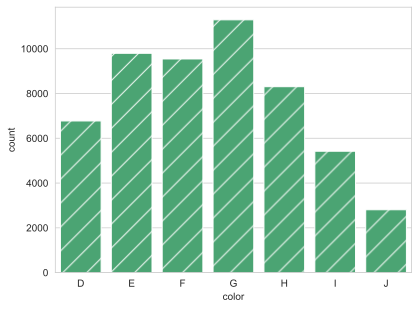

In [21]:
sns.countplot(data=diamonds, x='color',
              color='MediumSeaGreen',
              hatch='/');

Чем больше слэшей, тем чаще будет штриховка:

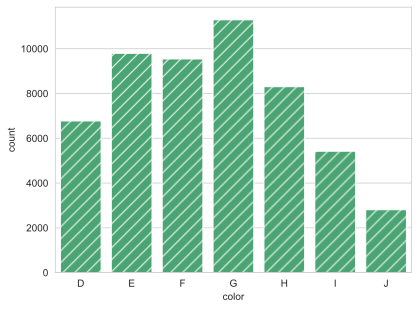

In [22]:
sns.countplot(data=diamonds, x='color',
              color='MediumSeaGreen',
              hatch='//');

Параметр `edgecolor`, помимо цвета границ, управляет также цветом штриховки:

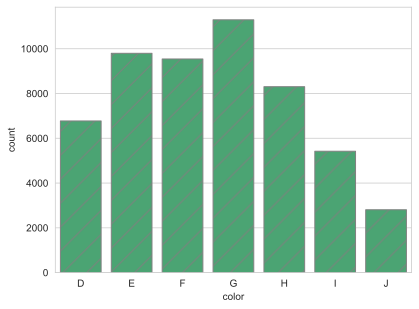

In [23]:
sns.countplot(data=diamonds, x='color',
              color='MediumSeaGreen',
              edgecolor='grey',
              hatch='/');

А шириной линии штриховки можно варьировать, используя словарь глобальных параметров настройки библиотеки *matplotlib* - `plt.rcParams` с параметром `'hatch.linewidth'`.

Пример использования параметра hatch совместно с `plt.rcParams['hatch.linewidth']`.

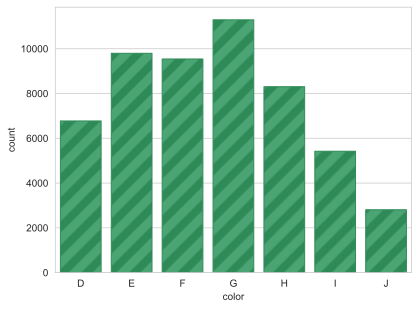

In [24]:
plt.rcParams['hatch.linewidth'] = 8

sns.countplot(data=diamonds, x='color',
              color='MediumSeaGreen',
              edgecolor='SeaGreen',
              hatch='/');

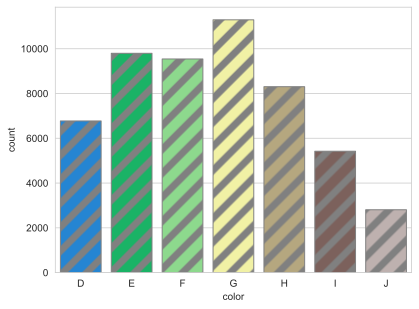

In [25]:
plt.rcParams['hatch.linewidth'] = 7

sns.countplot(data=diamonds, x='color', hue='color',
              edgecolor='grey',
              hatch='/',
              palette='terrain');

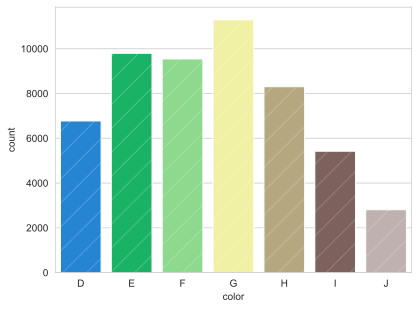

In [26]:
plt.rcParams['hatch.linewidth'] = 0.2

sns.countplot(data=diamonds, x='color', hue='color',
              edgecolor='white',
              hatch='/',
              palette='terrain');

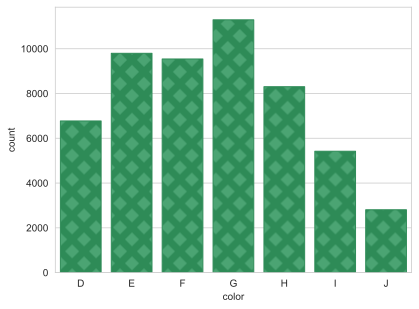

In [27]:
plt.rcParams['hatch.linewidth'] = 7

sns.countplot(data=diamonds, x='color', 
              color='MediumSeaGreen',
              edgecolor='SeaGreen',
              hatch='x');

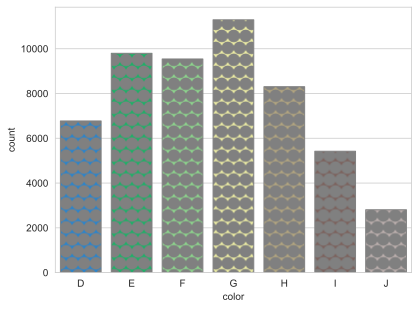

In [28]:
plt.rcParams['hatch.linewidth'] = 8

sns.countplot(data=diamonds, x='color', hue='color',
              edgecolor='grey',
              hatch='o',
              palette='terrain');